# Data Analysis
explore decisions 2010-2020 concerning Strafsachen (criminal cases) from Bundesgerichtshof BGH (Federal Court of Justice) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

In [10]:
# read json data as pandas dataframe df
df = pd.read_json('data/dataframes/restructured_bgh_decisions.json', orient='columns', encoding='utf-8')

In [13]:
# show 5 randomly selected rows from dataframe df
df.sample(5)

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende
14,3 StR 499/09,20100119,JURE100059128,BGH,3. Strafsenat,Beschluss,Unterbringung in einer Entziehungsanstalt: Tei...,[1. Auf die Revision des Angeklagten wird das ...,[Das Landgericht hat den Angeklagten wegen Die...
5273,5 StR 522/13,20131212,JURE140000306,BGH,5. Strafsenat,Beschluss,Bewaffnetes Handeltreiben mit Betäubungsmittel...,[Die Revision des Angeklagten gegen das Urteil...,[Das Landgericht hat den Angeklagten wegen bew...
1733,2 StR 421/17,20180905,KORE607902018,BGH,2. Strafsenat,Beschluss,Prinzip des gesetzlichen Richters im Strafverf...,[Die Revisionen der Angeklagten gegen das Urte...,[Das Landgericht hat den Angeklagten M. wege...
1234,3 StR 239/12,20121115,JURE130000688,BGH,3. Strafsenat,Beschluss,Strafverfahren: Richterablehnung mit einer völ...,[Das Ablehnungsgesuch gegen Richter am Bundesg...,"[I., None, Mit Beschluss vom 18. September 201..."
920,2 StR 545/18,20190430,KORE626052019,BGH,2. Strafsenat,Beschluss,Berücksichtigung eines rechtskräftig angeordne...,[1. Dem Angeklagten wird nach Versäumung der F...,[Das Landgericht hatte den Angeklagten mit Urt...


# fehlende Daten I

In 198 Fällen fehlen die Titel.

In [26]:
len(np.where(pd.isnull(df))[0])

198

In [27]:
np.where(pd.isnull(df))

(array([ 378,  392,  400,  499,  517,  544,  560,  562,  660,  680,  686,
         716,  725,  744,  755,  774,  778,  779,  787,  791,  795,  816,
         820,  830,  850,  851,  852,  853,  863,  868,  903,  935,  968,
         978, 1387, 1404, 1430, 1509, 1546, 1667, 1682, 1694, 1696, 1730,
        1740, 1745, 1748, 1769, 1781, 1786, 1795, 1819, 1821, 1836, 1840,
        1843, 1845, 1846, 1867, 1871, 1876, 1883, 1889, 1895, 1972, 1983,
        1986, 2028, 2105, 2266, 2300, 2346, 2369, 2658, 2667, 2676, 2679,
        2680, 2685, 2694, 2698, 2713, 2758, 2770, 2777, 2781, 2782, 2788,
        2795, 2803, 2812, 2820, 2826, 2840, 2842, 2846, 2914, 2928, 2952,
        2969, 2997, 3086, 3325, 3329, 3348, 3363, 3434, 3493, 3627, 3631,
        3642, 3645, 3651, 3677, 3679, 3707, 3723, 3732, 3737, 3752, 3759,
        3761, 3765, 3777, 3817, 3829, 3831, 3834, 3848, 3862, 3871, 3899,
        4104, 4192, 4401, 4420, 4495, 4541, 4551, 4580, 4685, 4714, 4716,
        4717, 4718, 4724, 4725, 4728, 

# Dokumenttypen

Es gibt 6 verschiedene Dokumententypen: ['Beschluss' 'Urteil' 'Vorlagebeschluss' 'EuGH-Vorlage' 'Entscheidung'
 'Verfügung']. Insgesamt 1277 Urteile, 4526 Beschlüsse, 1 Entscheidung, 2 Verfügungen, 11 Vorlagebeschlüsse, 9 EuGH-Vorlagen.

In [15]:
unique_values_doktyp = df.doktyp.unique()
unique_values_doktyp

array(['Beschluss', 'Urteil', 'Vorlagebeschluss', 'EuGH-Vorlage',
       'Entscheidung', 'Verfügung'], dtype=object)

In [16]:
anz_urteil = df[df.doktyp == 'Urteil'].shape[0]
anz_urteil

1277

In [17]:
anz_beschluss = df[df.doktyp == 'Beschluss'].shape[0]
anz_beschluss

4526

In [18]:
anz_entscheidung = df[df.doktyp == 'Entscheidung'].shape[0]
anz_entscheidung

1

In [19]:
anz_verfuegung = df[df.doktyp == 'Verfügung'].shape[0]
anz_verfuegung

2

In [20]:
anz_vorlagebeschluss = df[df.doktyp == 'Vorlagebeschluss'].shape[0]
anz_vorlagebeschluss

11

In [21]:
anz_eughvorlage = df[df.doktyp == 'EuGH-Vorlage'].shape[0]
anz_eughvorlage

9

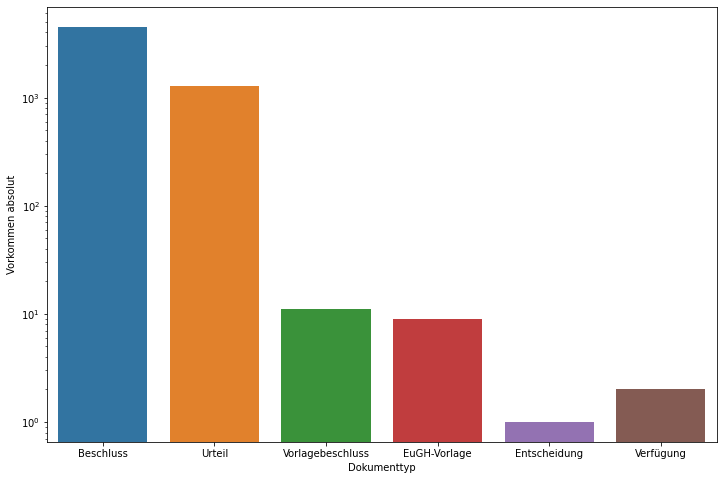

In [22]:
# plot distribution of doktyp
f1 = plt.figure(figsize=(12,8))
x2 = unique_values_doktyp
y2 = [anz_beschluss, anz_urteil, anz_vorlagebeschluss, anz_eughvorlage, anz_entscheidung, anz_verfuegung]
ax2 = sns.barplot(x=x2, y=y2)
ax2.set(xlabel='Dokumenttyp', ylabel='Vorkommen absolut')
plt.yscale('log')
plt.show()
#f1.savefig("images/plots/doktyp.png", bbox_inches="tight", dpi=600)

# Spruchkörper

Es gibt 6 verschiedene Spruchkörper: ['2. Strafsenat' '3. Strafsenat' '5. Strafsenat' '4. Strafsenat'
 '1. Strafsenat' '6. Strafsenat']. 1245 mal 1. Strafsenat, 1255 mal 2. Strafsenat, 1290 mal 3. Strafsenat, 1195 mal 4. Strafsenat, 835 mal 5. Strafsenat, 6 mal 6. Stafsenat. 

In [23]:
unique_values_spruchkoerper = df.spruchkoerper.unique()
unique_values_spruchkoerper

array(['2. Strafsenat', '3. Strafsenat', '5. Strafsenat', '4. Strafsenat',
       '1. Strafsenat', '6. Strafsenat'], dtype=object)

In [24]:
anz_ersterStrSen = df[df.spruchkoerper == '1. Strafsenat'].shape[0]
anz_ersterStrSen

1245

In [25]:
anz_zweiterStrSen = df[df.spruchkoerper == '2. Strafsenat'].shape[0]
anz_zweiterStrSen

1255

In [26]:
anz_dritterStrSen = df[df.spruchkoerper == '3. Strafsenat'].shape[0]
anz_dritterStrSen

1290

In [27]:
anz_vierterStrSen = df[df.spruchkoerper == '4. Strafsenat'].shape[0]
anz_vierterStrSen

1195

In [28]:
anz_fuenfterStrSen = df[df.spruchkoerper == '5. Strafsenat'].shape[0]
anz_fuenfterStrSen

835

In [29]:
anz_sechsterStrSen = df[df.spruchkoerper == '6. Strafsenat'].shape[0]
anz_sechsterStrSen

6

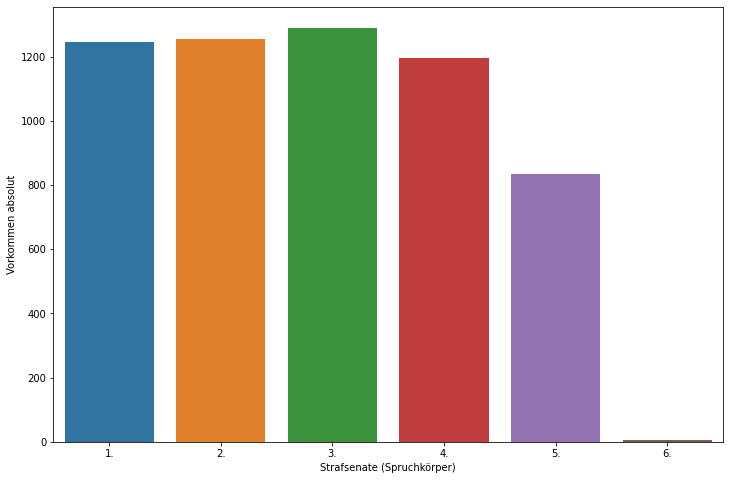

In [30]:
f = plt.figure(figsize=(12,8))
#sns.set(style="white", context="notebook")
x = ["1.", "2.", "3.","4.", "5.", "6."]
y = [anz_ersterStrSen, anz_zweiterStrSen, anz_dritterStrSen, anz_vierterStrSen, anz_fuenfterStrSen, anz_sechsterStrSen]
ax = sns.barplot(x=x, y=y)#, palette="rocket")
ax.set(xlabel='Strafsenate (Spruchkörper)', ylabel='Vorkommen absolut')
plt.show()
#f.savefig("images/plots/strafsenate.png", bbox_inches="tight", dpi=600)

# Entscheidungsdatum

In [31]:
unique_values_datum = df.datum.unique()

In [32]:
print(len(unique_values_datum))

1520


In [33]:
# datum in df in datumsformat umwandeln
df['datum'] = df['datum'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [34]:
# show sample rows with formatted datum
df.sample(3)

,az,datum,doknr,gertyp,spruchkoerper,doktyp,titel,tenor,gruende
3753,2 StR 345/17,2017-12-13,KORE617722018,BGH,2. Strafsenat,Urteil,Schwerer sexueller Missbrauch von Kindern: Ein...,[1. Die Revision des Angeklagten gegen das Urt...,[Das Landgericht hat den Angeklagten wegen sch...
930,StB 4/18,2018-07-31,KORE626882018,BGH,3. Strafsenat,Beschluss,(Anfechtbarkeit einer ermittlungsrichterlichen...,[Die Beschwerde des Beschuldigten gegen den Be...,"[I., None, Der Generalbundesanwalt hat gegen d..."
198,1 StR 212/12,2012-08-07,JURE120015855,BGH,1. Strafsenat,Beschluss,Richterablehnung im Strafverfahren: Vorbefassu...,[Die Befangenheitsanträge des Angeklagten vom ...,[Der Senat hat über eine Revision des Antragst...


Text(0, 0.5, 'Vorkommen absolut')

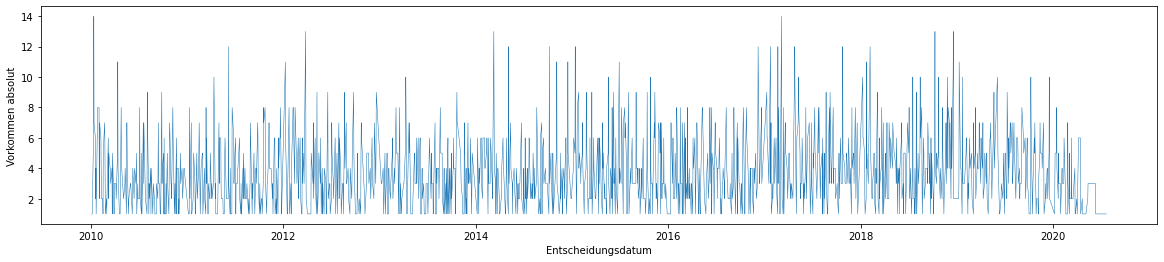

In [35]:
# plot distribution of documents over time
f2 = plt.figure(figsize=(20,4))
plt.plot(df['datum'].value_counts().sort_index(), lw=0.5)
plt.xlabel('Entscheidungsdatum')
plt.ylabel("Vorkommen absolut")

#f2.savefig("images/plots/entscheidungsdaten.png", bbox_inches="tight", dpi=600)

# Textkategorie Tenor

None aus Tenorlisten entfernen

In [36]:
def filterNone(liste: list):
    return list(filter(None, liste))

style information aus Tenor entfernen

In [37]:
def filterStyle(liste: list):
    for i, item in enumerate(liste):
        if type(item) == dict and "#text" in item:
            liste[i] = item["#text"]
        if type(item) == dict and "#text" not in item:
            liste[i] = None
    return liste

Filterfunktionen auf data frame anwenden

In [38]:
df["tenor"] = df["tenor"].apply(filterStyle).apply(filterNone)

Beispiel für gefilterten Tenor

In [39]:
df.iloc[4003].tenor

['1. Die Revision des Angeklagten I.\xa0gegen das Urteil des Landgerichts Berlin vom 14. Mai 2009 wird nach § 349 Abs. 2 StPO als unbegründet verworfen. Der Beschwerdeführer hat die Kosten seines Rechtsmittels zu tragen.',
 '2. Auf die Revision des Angeklagten Q.\xa0wird das vorgenannte Urteil, soweit es ihn betrifft, nach § 349 Abs. 4 StPO mit den zugehörigen Feststellungen aufgehoben. Die Sache wird insoweit zu erneuter Verhandlung und Entscheidung, auch über die Kosten des Rechtsmittels, an eine andere Strafkammer des Landgerichts zurückverwiesen.']

Listenelemente in Tenor zu einem Tenortext zusammenführen

In [40]:
def concatenateTenor(tenor_list: list):
    return " ".join(tenor_list)

Text bereinigen: "\xa0" entfernen

In [41]:
def cleanTenorTxt(tenor_text: str):
    return re.sub(r"[\xa0]+", " ", tenor_text)

Anwenden auf Dataframe. Listen in Text zusammenführen, anschließend Text säubern

In [42]:
df["tenor"] = df["tenor"].apply(concatenateTenor).apply(cleanTenorTxt)

2 Beispiele für gesäuberten Tenor

In [43]:
df.iloc[5].tenor

'Die Revisionen der Angeklagten gegen das Urteil des Landgerichts Bielefeld vom 18. Mai 2009 werden als unbegründet verworfen, da die Nachprüfung des Urteils auf Grund der Revisionsrechtfertigungen im Ergebnis keinen Rechtsfehler zum Nachteil der Angeklagten ergeben hat (§ 349 Abs. 2 StPO). Es wird davon abgesehen, den Angeklagten D. und H. die Kosten und gerichtlichen Auslagen ihrer Rechtsmittel aufzuerlegen. Jedoch werden ihnen, ebenso wie der Angeklagten B., die ihrerseits die Kosten ihres Rechtsmittels zu tragen hat, die dem Nebenkläger im Revisionsverfahren entstandenen notwendigen Auslagen auferlegt. Ergänzend zu den Ausführungen des Generalbundesanwalts bemerkt der Senat: Bei keinem der drei Angeklagten ist das Landgericht von mittäterschaftlichem Zusammenwirken ausgegangen. Aus der - für sich genommen missverständlichen - Formulierung, der Angeklagten B. seien auch die durch die Tritte des Angeklagten H. verursachten Kopfverletzungen als vorsätzlich verursacht zuzurechnen (UA 2

In [44]:
df.iloc[193].tenor

'Die Revision des Angeklagten gegen das Urteil des Landgerichts Bonn vom 25. Mai 2011 wird mit der Maßgabe als unbegründet verworfen, dass die Urteilsformel dahin ergänzt wird, dass die in Griechenland erlittene Auslieferungshaft im Verhältnis 1 : 1 auf die erkannte Strafe angerechnet wird. Im Übrigen hat die Nachprüfung des Urteils auf Grund der Revisionsrechtfertigung keinen Rechtsfehler zum Nachteil des Angeklagten ergeben. Der Beschwerdeführer hat die Kosten des Rechtsmittels und die der Nebenklägerin im Revisionsverfahren entstandenen notwendigen Auslagen zu tragen. Ergänzend bemerkt der Senat: Zwar verstößt es in der Regel gegen das Doppelverwertungsverbot des § 46 Abs. 3 StGB, wenn der Umstand, dass der Angeklagte mit direktem Tötungsvorsatz gehandelt hat, als solcher straferschwerend verwertet wird, weil damit nur der Normalfall des § 212 StGB gekennzeichnet wird (BGHR StGB § 46 Abs. 3 Tötungsvorsatz 1, 3, 4, 5; BGH NStZ 2008, 624; aA S/S/W-StGB/Eschelbach § 46 Rn. 185). Dies g

# Gründe

In [45]:
# Beispiel für noch unsauberen Text der Kategorie Gründe
df.iloc[4].gruende

['Das Landgericht hat den Angeklagten T.\xa0wegen bandenmäßigen Handeltreibens mit Betäubungsmitteln in nicht geringer Menge in 13 Fällen zu der Gesamtfreiheitsstrafe von sechs Jahren und acht Monaten verurteilt. Den Angeklagten Ö.\xa0hat es wegen bandenmäßigen Handeltreibens mit Betäubungsmitteln in nicht geringer Menge in acht Fällen, Handeltreibens mit Betäubungsmitteln in nicht geringer Menge in 3 Fällen sowie wegen schweren Menschenhandels zum Zweck der sexuellen Ausbeutung in Tateinheit mit schwerem Menschenhandel zum Zweck der sexuellen Ausbeutung zur Gesamtfreiheitsstrafe von sieben Jahren und acht Monaten verurteilt. Ferner hat das Landgericht die Unterbringung des Angeklagten Ö.\xa0in einer Entziehungsanstalt angeordnet und bestimmt, dass die Freiheitsstrafe für die Dauer von einem Jahr und zehn Monaten vor der Unterbringung zu vollziehen ist.',
 None,
 'Die Revision des Angeklagten Ö.\xa0rügt allgemein die Verletzung materiellen Rechts. Der Angeklagte T.\xa0wendet sich ebenf

### Texte der Kategorie Gründe säubern

In [59]:
# function from https://hackersandslackers.com/extract-data-from-complex-json-python/
def extract_values(obj, key):
    """Pull all values of specified key from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    results = extract(obj, arr, key)
    return results

In [60]:
# filter #text tags
def filterStyleDeep(liste: list):
    for i, item in enumerate(liste):
        if type(item) == dict:
            values = extract_values(item, "#text")
            liste[i] = " ".join(values)        
    return liste

In [61]:
# apply filterStyleDeep on df
df["gruende"] = df["gruende"].apply(filterStyleDeep).apply(filterNone)

In [62]:
# concatenate text fragments of Gründe
df["gruende"] = df["gruende"].apply(concatenateTenor).apply(cleanTenorTxt)

#### <span style='background:pink'>Save dataframe to json file:

In [63]:
# df.to_json("data/dataframes/df.json")

#### <span style='background:lightgreen'>Load dataframe from df.json</span>

In [49]:
data = pd.read_json('data/dataframes/df.json', orient='columns', encoding='utf-8')

### Fehlende Daten II

In [53]:
def checkForEmptyString(item):
    if item == "":
        return True
    else:
        return False    

Gruende fehlt 443 mal

In [62]:
empties_gruende = data["gruende"].apply(checkForEmptyString)
empties_gruende.sum()

443

Tenor fehlt 1 mal

In [63]:
empties_tenor = data["tenor"].apply(checkForEmptyString)
empties_tenor.sum()

1

Titel fehlt 198 mal

In [82]:
np.where(pd.isna(data["titel"]))[0].shape

(198,)

Die anderen Kategorien / Spalten scheinen vollständig belegt

In [85]:
np.where(pd.isna(data["doktyp"]))

(array([], dtype=int64),)

In [86]:
np.where(pd.isna(data["spruchkoerper"]))

(array([], dtype=int64),)

In [87]:
np.where(pd.isna(data["az"]))

(array([], dtype=int64),)

## Länge der Texte

In [66]:
def getLengthOfText(text):
    if text:
        return len(text)
    else:
        return 0

In [67]:
len_titel = data["titel"].apply(getLengthOfText)

In [68]:
# maximum length Titel
len_titel.max()

563

In [69]:
len_tenor = data["tenor"].apply(getLengthOfText)

In [70]:
# maximum length Tenor
len_tenor.max()

15965

In [71]:
len_tenor.min()

0

In [72]:
# mean length Tenor
len_tenor.mean()

669.4249914177824

In [74]:
len_gruende = data["gruende"].apply(getLengthOfText)

In [75]:
# maximum length Gründe
len_gruende.max()

132487

In [47]:
# mean length Gründe
len_gruende.mean()

9304.9733951253

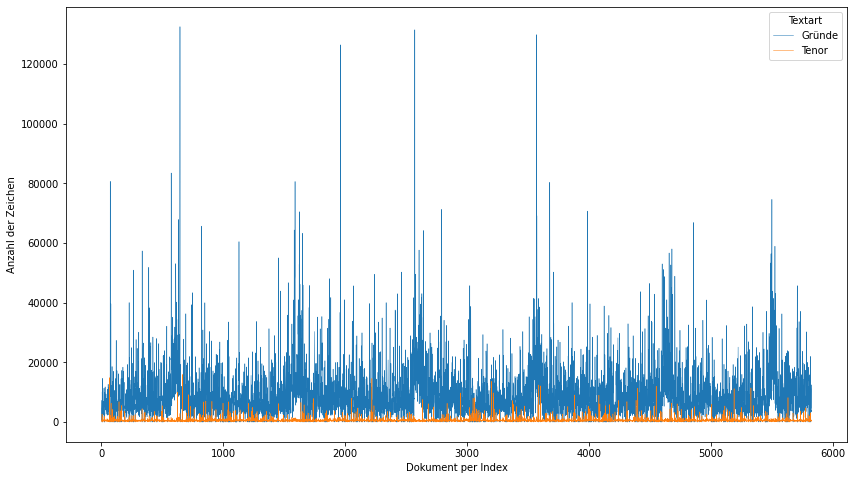

In [76]:
f3 = plt.figure(figsize=(14,8))

data_preproc = pd.DataFrame({
    'Document': data.index, 
    'Gruende': len_gruende,
    'Tenor': len_tenor})

sns.lineplot(x='Document', y='value', hue='variable', legend=False, data=pd.melt(data_preproc, ['Document']), lw=0.5).set(xlabel='Dokument per Index', ylabel='Anzahl der Zeichen')
plt.legend(title="Textart",loc='upper right', labels=['Gründe', 'Tenor'])

#f3.savefig("images/plots/textlaenge.png", bbox_inches="tight", dpi=600)